In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, f1_score
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import math
import pymysql
import warnings
from functools import reduce
warnings.filterwarnings("ignore")
pd.set_option('display.max_column', None)
dbcon = pymysql.connect(host="localhost",user= "root",password= "root",database= "jobms")

In [ ]:
df=pd.read_sql_query("""select * from consolidated_search_ds;""", dbcon)

In [ ]:
df

,Job Title,Company,Area,Employer Email,Employer Contact Number,Salary,Lower Salary Range,Upper Salary Range,Job Highlights,Job Description,Career Level,Qualification,Years of Experience,Job Type,Company Website,Job Link,Job Functions,Industry,Search Term,Date Posted,Date Scraped,Data Source,jobtick_avgsalary,jobtick_SQL,jobtick_Excel,jobtick_dashboard,jobtick_Python,jobtick_engineerjobs,jobtick_analystjobs,jobtick_scientistjobs
0,Business Analyst (Data Analysis),EC Healthcare,Not Specified,None,None,Not Specified,NaN,NaN,"['Develop and built segmentation platform', 'C...","['Job Descriptions:', 'Develop strategic KPIs ...",Entry,Not Specified,-1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-analyst-data-analysis-1000...,"Information Technology (IT), DBA, E-commerce, ...",Health & Beauty Care,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1,Data Analyst Leader,A4lution Limited,Not Specified,None,['3955 8549'],Not Specified,NaN,NaN,"['Drive automation of analytical projects', 'I...","['Responsibilities:', 'Work closely with senio...",Senior,Degree,3.0,Full Time,Not Specified,/hk/en/job/data-analyst-leader-100003008838120,"Information Technology (IT), Data Scientist",Others,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
2,Data Analyst – Campaign Specialist,now TV,Not Specified,None,['2827 8322'],Not Specified,NaN,NaN,['Interpret & analyze data for campaign evalua...,"['The Job:', 'Hands on experience in conductin...",Entry,Degree,1.0,Full Time,http://www.pccw.com,/hk/en/job/data-analyst-campaign-specialist-10...,"Marketing / Public Relations, Others, Informat...",Telecommunication,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
3,Consultant / Senior Consultant - Data Scientis...,Deloitte Global Services Limited,Not Specified,None,None,Not Specified,NaN,NaN,"['data scientist', 'digital', 'tableau']","['About Technology', 'Deloitte Digital is a bo...",Entry,Degree,2.0,Full Time,http://www.deloitte.com,/hk/en/job/consultant-senior-consultant-data-s...,"Professional Services, Business Analysis / Dat...",Accounting/Audit/Tax Services,Data Scientist,10-21-2021,22-10-2021,JobsDB,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0
4,Business Intelligence Assistant / Data Analyst...,Lloyd Karson International Limited,Not Specified,None,None,HK$17K - 25K /month,17.0,25.0,"['Experience with Python', 'Good Data Analytic...",['The client is a global prestigious MNC Insur...,Entry,Degree,1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-intelligence-assistant-dat...,"Professional Services, Business Analysis / Dat...",Human Resources Management/Consultancy,Data Scientist,10-22-2021,22-10-2021,JobsDB,21.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,Senior Application Reliability Engineer,Manulife (International) Limited,-,None,None,Not Specified,NaN,NaN,Not Specified,Not Specified,Senior,Not Specified,7.5,Not Specified,Not Specified,https://www.ctgoodjobs.hk/job/senior-applicati...,Not Specified,Not Specified,Business Intelligence,09-28-2021,22-10-2021,CTGoodJobs,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3207,Application Developer,PCCW Solutions Limited,Admiralty,None,None,Not Specified,NaN,NaN,Not Specified,Not Specified,Entry,Not Specified,1.5,Not Specified,Not Specified,https://www.ctgoodjobs.hk/job/solution-develop...,Not Specified,Not Specified,Business Intelligence,09-28-2021,22-10-2021,CTGoodJobs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3208,Senior Solution Analyst - Application developm...,PCCW Solutions Limited,Tai Kok Tsui,None,None,Not Specified,NaN,NaN,Not Specified,Not Specified,Middle,Not Specified,6.0,Not Specified,Not Specified,https://www.ctgoodjobs.hk/job/senior-solution-...,Not Specified,Not Specified,Business Intelligence,09-28-2021,22-10-2021,CTGoodJobs,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3209,IT Project Manager,Top Form International Limited,Wong 

## Total number of data science jobs: 3211

In [ ]:
%%time
start='\033[1m'
end='\033[0;0m'

Wall time: 0 ns


In [ ]:
%%time
     
# function for getting details of the dataframe
def details(df):
    print(start+'Shape of the Dataframe:'+end,df.shape,'\n')
    print(start+'Summary Of the dataframe:'+end,'\n')
    print(df.info(),'\n')
    print(start+'Statistical Summary of the Dataframe:'+end,'\n',df.describe(),'\n')
    print(start+'Checking for Null values in the dataframe:'+end,'\n',df.isnull().sum(),'\n')
    print(start+'Columns in dataframe:'+end,df.columns)
    
    
#function for getting insigt for each column values
def values_in_columns(df):
    for i in df.columns:
        print(start+'Column Name--->'+i+end)
        print('Number of Unique Values',df[i].nunique(),'\n')
        print('Count of each unique value \n',df[i].value_counts(),'\n')
        
        
        
# function for dropping duplicates        
def duplicate(df):
    if df.duplicated().sum()>0:
        print(start+'Dataframe contains duplicate values'+end,df.duplicated().sum())
        df.drop_duplicates(inplace=True,ignore_index=True)
        print('Details of dataframe after droping the Duplicate rows')
        details(df)
    else:
        print("Dataframe doesn't contains dublicate Values")
        
font = {'family': 'serif',
            'weight': 'normal',
            'size': 30,
            }
#function for ploting bar graph for each column of the dataframe
def plot_each_columns(data):
    for i in data.columns:
        if len(data[i].value_counts())>20:
            df = data[i].value_counts()[:20]
            plt.figure(figsize=(30,10))
            sns.barplot(x=df.index, y=df)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.title(i,fontdict=font)
            
        else:
            df = data[i].value_counts()
            plt.figure(figsize=(30,10))
            sns.barplot(x=df.index, y=df)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.title(i,fontdict=font)

#function for plotting countplot of each with repect to any specific column for column havind unique value less than 20
def plot_columns(data,hue_name):

    for i in data.columns:
    
        if len(data[i].value_counts())<20:
            f, ax = plt.subplots(figsize=(10, 8))
            ax = sns.countplot(x=i, hue=hue_name, data=df)
            ax.set_title("Frequency distribution of "+i+" variable wrt "+hue_name)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.show()

            
# function for plotting box plot of each numerical column
def boxplot_variable(data):
    for i in numerical:  
        f, ax = plt.subplots(figsize=(10, 8))
        ax = sns.boxplot(x=i,  data=data)
        ax.set_title("Box Plot of "+i)
        plt.xticks(rotation=90,fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.show()

        
#function for plotting boxplot of each numerical column with respect to specific columns
def boxplot_mult(df,x,hue_name):
    for i in numerical:  
        f, ax = plt.subplots(figsize=(10, 8))
        ax = sns.boxplot( x=x,y=i,hue=hue_name, data=df)
        ax.set_title("Box Plot of "+i+" variable wrt "+x)
        plt.xticks(rotation=90,fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.show()
        


Wall time: 0 ns


In [ ]:
%%time
duplicate(df)

Dataframe doesn't contains dublicate Values
Wall time: 32.9 ms


In [ ]:
details(df)

Shape of the Dataframe: (3211, 30) 

Summary Of the dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                3211 non-null   object 
 1   Company                  3211 non-null   object 
 2   Area                     3211 non-null   object 
 3   Employer Email           167 non-null    object 
 4   Employer Contact Number  358 non-null    object 
 5   Salary                   3211 non-null   object 
 6   Lower Salary Range       318 non-null    float64
 7   Upper Salary Range       318 non-null    float64
 8   Job Highlights           3211 non-null   object 
 9   Job Description          3211 non-null   object 
 10  Career Level             3211 non-null   object 
 11  Qualification            3211 non-null   object 
 12  Years of Experience      3211 non-null   float64
 13  Job Type     

In [ ]:
%%time
values_in_columns(df)


Column Name--->Job Title
Number of Unique Values 2789 

Count of each unique value 
 Business Analyst                                   46
System Analyst                                     35
Analyst Programmer                                 31
Data Analyst                                       25
Data Scientist                                     17
                                                   ..
PMO Analyst - Insurance - 32k - Contract            1
Facility Engineer (Data Center)                     1
Territory Sales Manager (HK)                        1
Assistant Manager – Infrastructure and Security     1
IT Director                                         1
Name: Job Title, Length: 2789, dtype: int64 

Column Name--->Company
Number of Unique Values 1232 

Count of each unique value 
 IT Solutions Limited.                                                                  43
Robert Walters (HK)                                                                    40
Hong Kong Ap

 Degree                 1984
Not Specified           679
Non-Degree Tertiary     441
Matriculated             32
Postgraduate             30
School Certificate       23
(N/A)                    20
:                         1
Primary                   1
Name: Qualification, dtype: int64 

Column Name--->Years of Experience
Number of Unique Values 26 

Count of each unique value 
 -1.0     1073
 3.0      471
 2.0      445
 5.0      380
 1.0      323
 4.0      124
 8.0      109
 6.0       97
 10.0      79
 7.0       41
 12.0      13
 7.5       12
 15.0       8
 4.5        5
 9.0        4
 1.5        4
 10.5       4
 13.0       3
 2.5        3
 5.5        3
 6.5        3
 8.5        2
 3.5        2
 0.0        1
 0.5        1
 9.5        1
Name: Years of Experience, dtype: int64 

Column Name--->Job Type
Number of Unique Values 41 

Count of each unique value 
 Full Time, Permanent                                                1822
Full Time                                                

Number of Unique Values 39 

Count of each unique value 
 50.0     41
30.0     28
40.0     25
62.5     22
37.5     22
45.0     22
32.5     17
72.5     14
57.5     12
25.0     11
27.5     11
21.0     11
35.0     10
80.0      9
105.0     9
22.5      7
67.5      6
18.5      5
42.5      5
87.5      3
125.0     3
17.0      2
26.0      2
19.5      2
95.0      2
52.5      2
115.0     2
4.0       2
49.0      1
70.0      1
140.0     1
60.0      1
22.0      1
31.0      1
23.5      1
14.0      1
132.0     1
166.0     1
47.5      1
Name: jobtick_avgsalary, dtype: int64 

Column Name--->jobtick_SQL
Number of Unique Values 1 

Count of each unique value 
 1.0    1050
Name: jobtick_SQL, dtype: int64 

Column Name--->jobtick_Excel
Number of Unique Values 1 

Count of each unique value 
 1.0    1167
Name: jobtick_Excel, dtype: int64 

Column Name--->jobtick_dashboard
Number of Unique Values 1 

Count of each unique value 
 1.0    293
Name: jobtick_dashboard, dtype: int64 

Column Name--->jobtick_Python

### Interpretations

Total Number of companies = 1232<br>
Total number of industry = 51<br>
Total Number of Job Type = 41<br>

total entry level jobs = 1328<br>
total number of middle level job =1000<br>
total number of senior level job = 883<br>

Total Data Scientist  jobs =  2490<br>
total Data Analyst jobs=    502<br>
total Business Intelligence jobs=   137<br>
total Data Engineer jobs =   55<br>
total Machine Learning Engineer = 27<br>

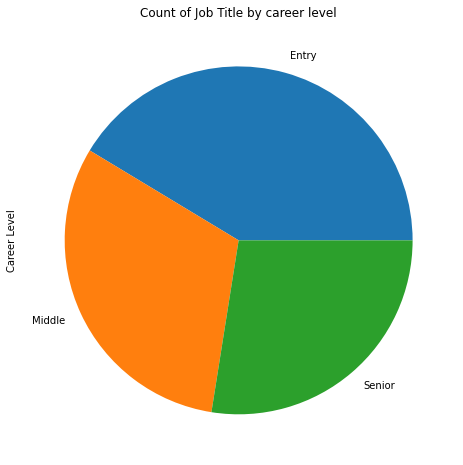

In [ ]:
df['Career Level'].value_counts().plot(kind='pie',figsize=(8,8),title='Count of Job Title by career level')

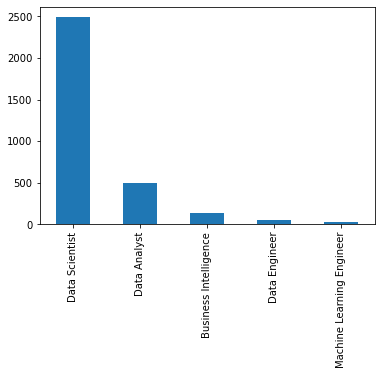

In [ ]:
df['Search Term'].value_counts().plot.bar()

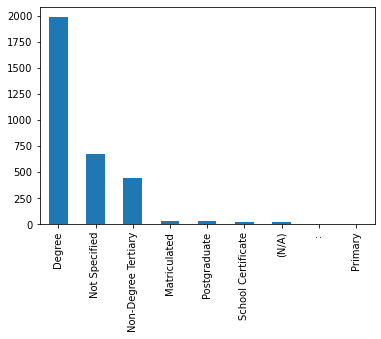

In [ ]:
df['Qualification'].value_counts().plot.bar()

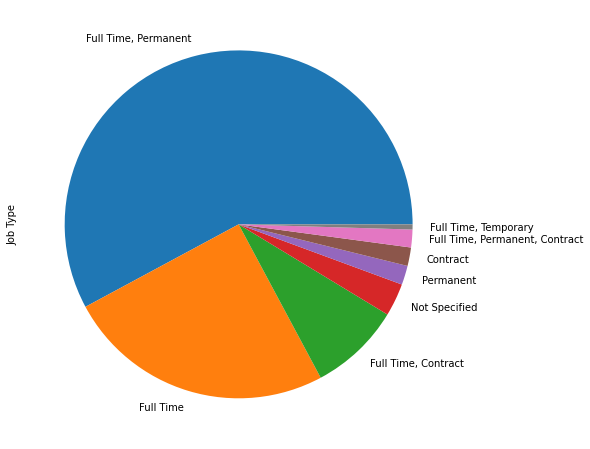

In [ ]:
df['Job Type'].value_counts()[:8].plot(kind='pie',figsize=(8,8))

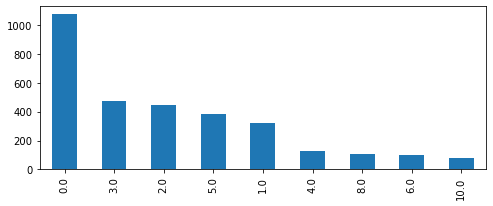

In [ ]:
df['Years of Experience'].replace(-1,0).value_counts()[:10].plot.bar(figsize=(8,3))

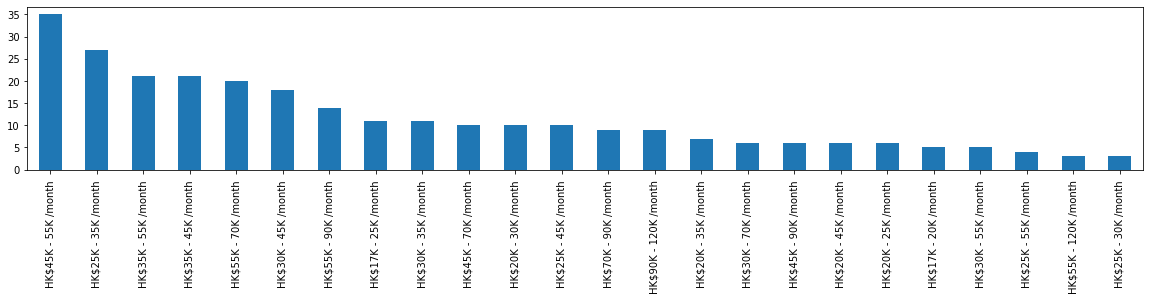

In [ ]:
df['Salary'].value_counts()[1:25].plot.bar(figsize=(20,3))

In [ ]:
df.columns

Index(['Job Title', 'Company', 'Area', 'Employer Email',
       'Employer Contact Number', 'Salary', 'Lower Salary Range',
       'Upper Salary Range', 'Job Highlights', 'Job Description',
       'Career Level', 'Qualification', 'Years of Experience', 'Job Type',
       'Company Website', 'Job Link', 'Job Functions', 'Industry',
       'Search Term', 'Date Posted', 'Date Scraped', 'Data Source',
       'jobtick_avgsalary', 'jobtick_SQL', 'jobtick_Excel',
       'jobtick_dashboard', 'jobtick_Python', 'jobtick_engineerjobs',
       'jobtick_analystjobs', 'jobtick_scientistjobs'],
      dtype='object')

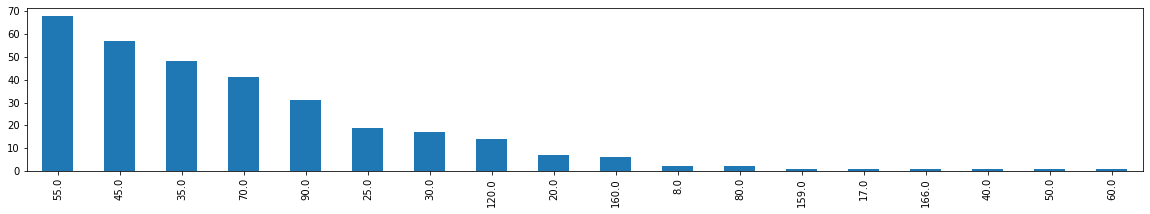

In [ ]:
df['Upper Salary Range'].value_counts().plot.bar(figsize=(20,3))

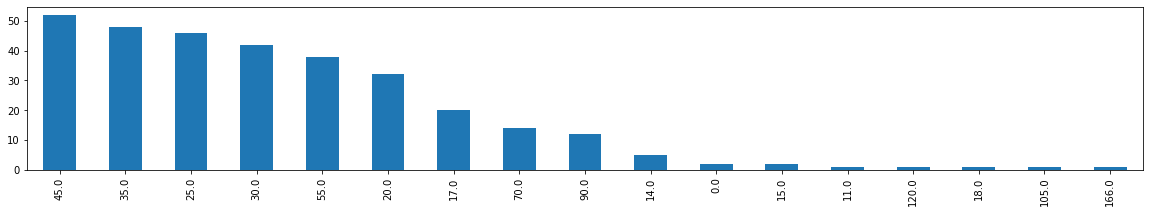

In [ ]:
df['Lower Salary Range'].value_counts().plot.bar(figsize=(20,3))